# Heart Disease Ensemble Classifier

## Predict Heart Disease of the participants 

#### in this kernel I will try to predict whether the person Suffers from heart disease or not

### Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA,FastICA

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

import itertools
import warnings
warnings.filterwarnings('ignore')

## import the data

In [2]:
data = pd.read_csv('Heart_Disease_Data.csv', na_values="?")
data["pred_attribute"].replace(inplace=True, value=[1, 1, 1, 1], to_replace=[1, 2, 3, 4])

## The describe of the data

1. age: age in years
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
    - A. Value 1: typical angina
    - B. Value 2: atypical angina
    - C. Value 3: non-anginal pain
    - D. Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
    - 1 = true
    - 0 = false
7. restecg: (resting electrocardiographic results)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
    - 1 = yes
    - 0 = no
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
     - Value 1: upsloping
     - Value 2: flat
     - Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: thalium heart scan
     - 3 = normal (no cold spots)
     - 6 = fixed defect (cold spots during rest and exercise)
     - 7 = reversible defect (when cold spots only appear during exercise)
14. pred_attribute: (the predicted attribute) diagnosis of heart disease (angiographic disease status)
     - Value 0: < 50% diameter narrowing
     - Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)

In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute'],
      dtype='object')

### View the first fields in the table

In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### the Target:

Diagnosis of heart disease (angiographic disease status): "pred_attribute":
- Value 0 = diameter narrowing <= 50% (Healthy)
- Value 1 = diameter narrowing > 50% (Sick)

0    164
1    139
Name: pred_attribute, dtype: int64

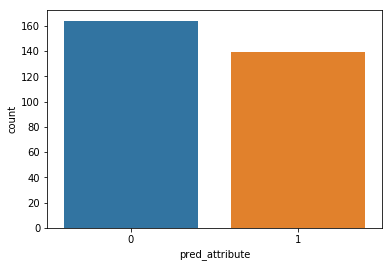

In [5]:
sns.countplot(x=data.pred_attribute,data=data)
data.pred_attribute.value_counts()

### searching for null data

In [6]:
data.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                4
thal              2
pred_attribute    0
dtype: int64

In [7]:
data.dropna(inplace=True, axis=0, how="any")
# data = data.fillna(data.mean()) // worse

### Review of features:

In [8]:
def Review_all_features_data(data):
    columns=data.columns[:13]
    plt.subplots(figsize=(20,15))
    length=len(columns)
    for i,j in itertools.zip_longest(columns,range(length)):
        plt.subplot((length/2),3,j+1)
        plt.subplots_adjust(wspace=0.2,hspace=0.5)
        data[i].hist(bins=20,edgecolor='black')
        plt.title(i)
    plt.show()

All participants: (with no condition)

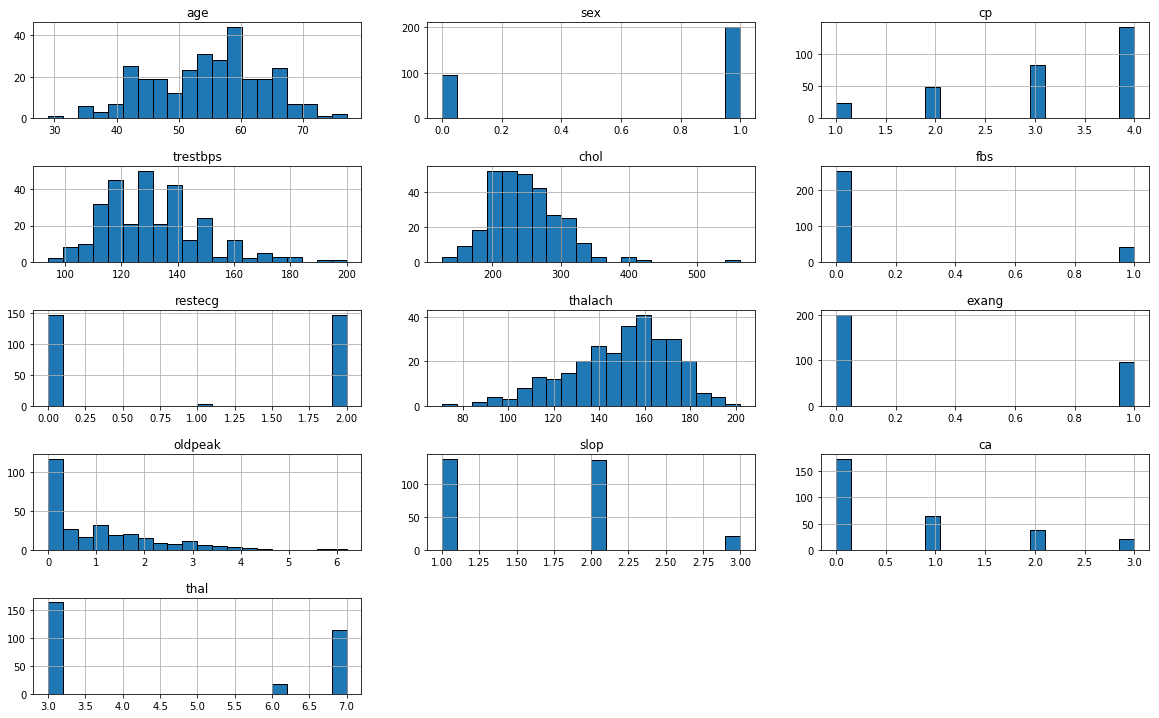

In [9]:
Review_all_features_data(data)

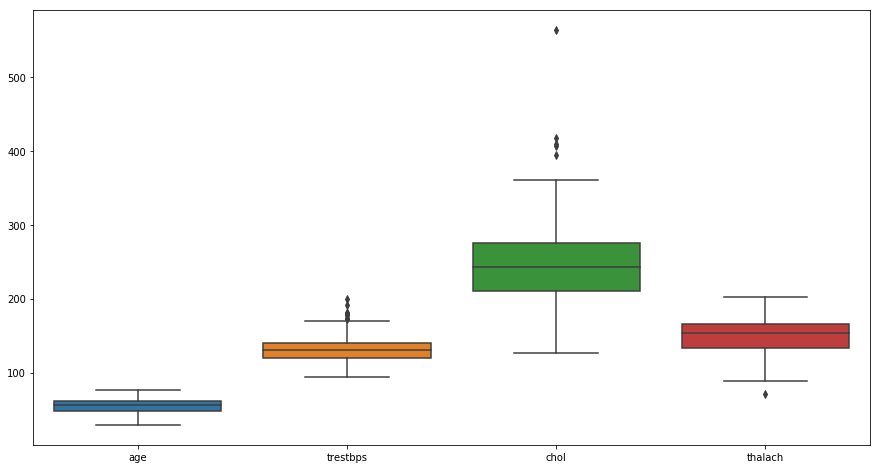

In [10]:
features_continuous = ['age','trestbps','chol','thalach'] #because the others are meaningless
sns.boxplot(data=data[features_continuous])
plt.gcf().set_size_inches(15,8)
# data[features_continuous].describe()

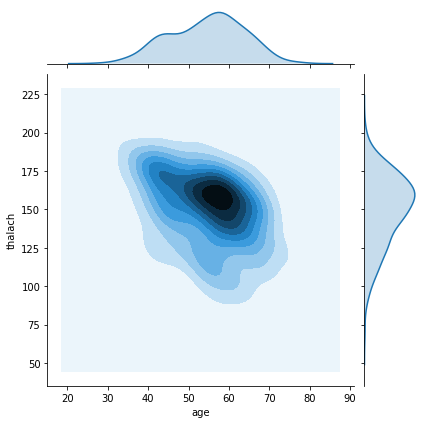

In [11]:
# Visualization of age and thalach(max heart rate)
sns.jointplot(data.age ,data.thalach,kind="kde")

In a rough estimate, most patients are at ages 50-60 with a maximum heart rate of 150 to 175

## Now we will see how the features affect the target

Only heart disease partipants: (where 'pred_attribute'=1)

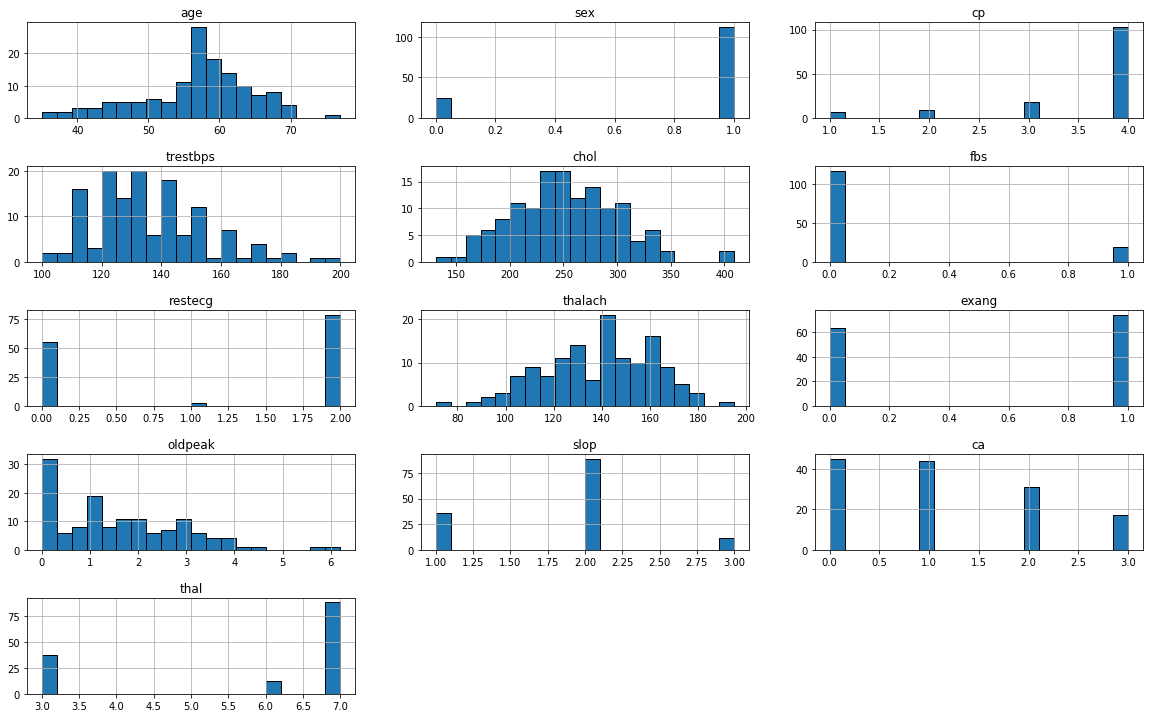

In [12]:
Review_all_features_data(data[data['pred_attribute']==1])

In [13]:
def count_plot(feature):
    sns.countplot(x=data[feature],hue='pred_attribute',data=data)
    plt.show()

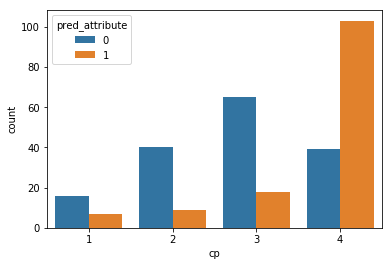

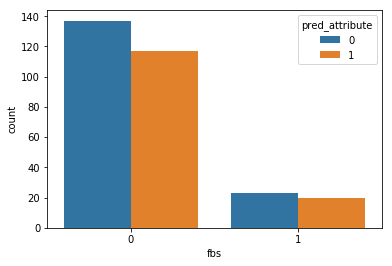

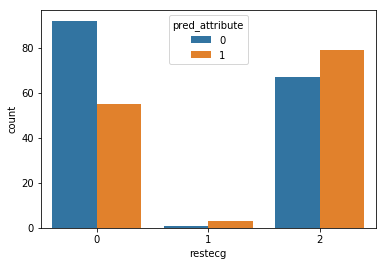

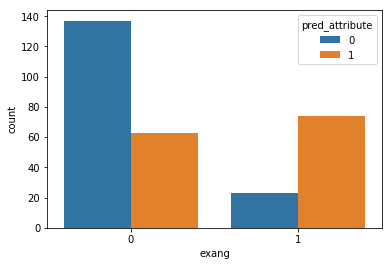

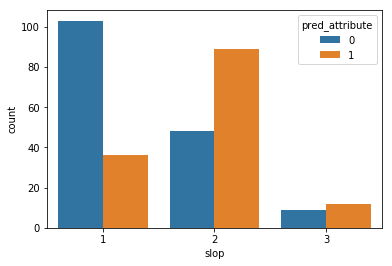

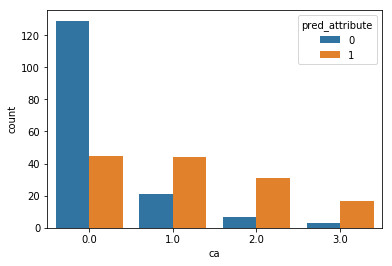

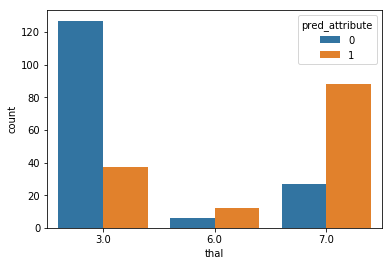

In [14]:
for f in ['cp','fbs','restecg','exang','slop','ca','thal']:
    count_plot(f)

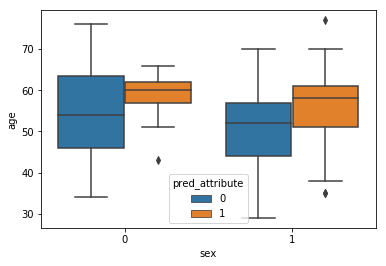

In [15]:
sns.boxplot(x=data.sex, y=data.age, hue=data.pred_attribute, data=data)

There are more men who are sick than women

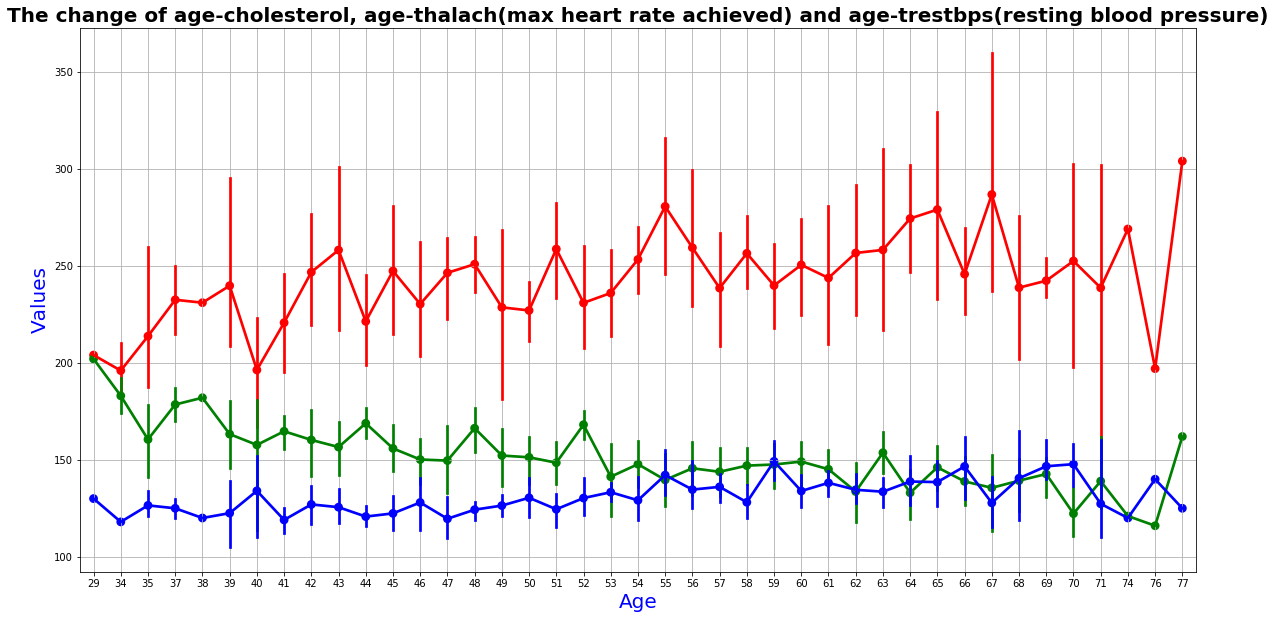

In [16]:
f,ax1 = plt.subplots(figsize =(20,10))
plt.title('The change of age-cholesterol, age-thalach(max heart rate achieved) and age-trestbps(resting blood pressure)'
          , fontsize=20, fontweight='bold')
sns.pointplot(x='age',y='chol',data=data,color='red')
sns.pointplot(x='age',y='thalach',data=data,color='green')
sns.pointplot(x='age',y='trestbps',data=data,color='blue')

plt.xlabel('Age',fontsize = 20,color='blue')
plt.ylabel('Values',fontsize = 20,color='blue')
plt.grid()

## Load data

In [17]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values

## Feature Selection

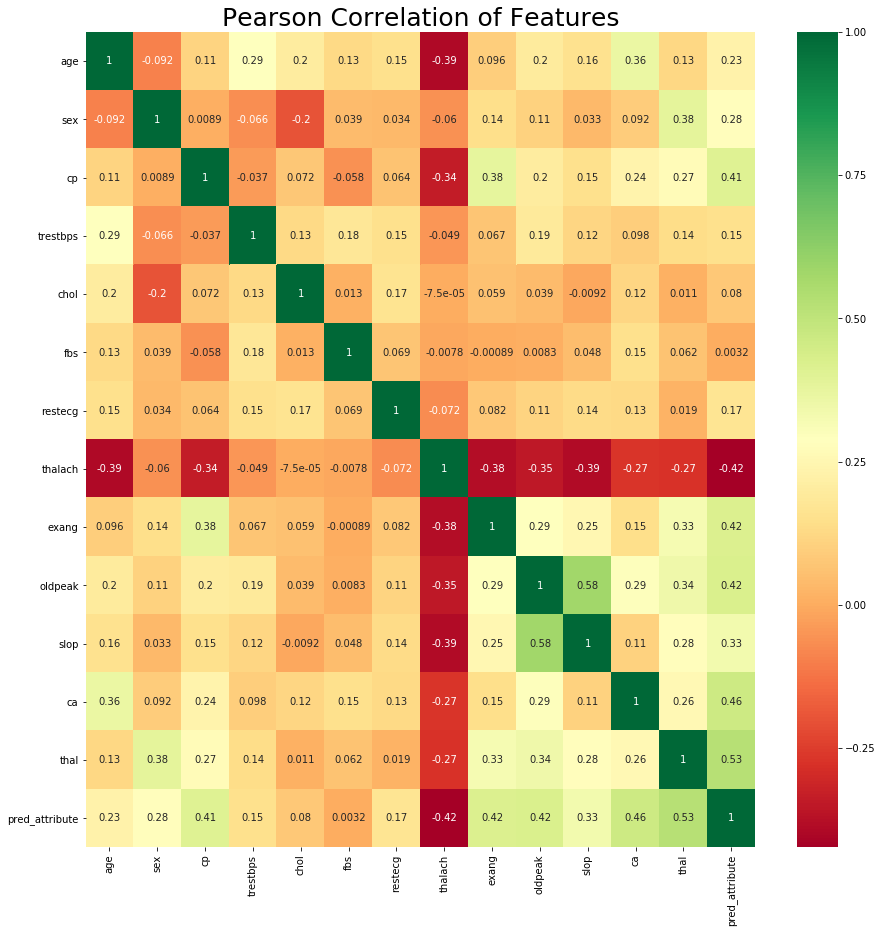

In [18]:
sns.heatmap(data[data.columns[:14]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.title('Pearson Correlation of Features', size=25)
plt.show()

we can see that there are no strongly correlated features.
This is good from a point of view of feeding these features into the Gaussian Naive Bayes model

In [19]:
bestfeatures = SelectKBest(score_func=chi2, k=13) #Select features according to the k highest scores.
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns[:-1])
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['important features','Score']
featureScores1 = featureScores1.nlargest(13,'Score')
featureScores1['importance_1'] = np.arange(1,14)
featureScores1.index = featureScores1['important features']
featureScores1 = featureScores1.drop(columns=['important features'])

In [20]:
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=data.columns[:-1])
featureScores2 = feat_importances.nlargest(13).to_frame()
featureScores2.columns = ['Score']
featureScores2['importance_2'] = np.arange(1,14)

let's see the features that have the strongest relationship with the output variable.

In [21]:
featureResults = pd.concat([featureScores1,featureScores2],axis=1, join='inner')
featureResults['avg'] = (featureResults['importance_1'] + featureResults['importance_2'])/2
featureResults=featureResults.sort_values('avg')
featureResults

,Score,importance_1,Score,importance_2,avg
ca,82.730613,2,0.138447,1,1.5
thalach,187.053104,1,0.092675,4,2.5
thal,65.221093,4,0.137332,2,3.0
oldpeak,68.570533,3,0.072685,5,4.0
exang,35.508090,5,0.072444,6,5.5
cp,14.591587,9,0.115579,3,6.0
age,22.917697,6,0.068197,7,6.5
chol,20.855084,7,0.065192,9,8.0
trestbps,16.707463,8,0.065608,8,8.0
slop,7.828836,11,0.062823,10,10.5


Choose the seven best features (the seven features that are in a higher position in the table)

In [22]:
dataset_select = data[['ca','thal','oldpeak','thalach','age','exang','cp','pred_attribute']]

In [23]:
#for confusion table
def cm_analysis(y_true, y_pred, labels, figsize=(7,6)):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    #plt.savefig(filename)
    plt.show()

## Feature Scaling and Splitting the data into training and testing set

In [24]:
random_state = 42
scaler = StandardScaler()

X = scaler.fit_transform(dataset_select.iloc[:, :-1].values)  
y = dataset_select.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state )

freqs = pd.DataFrame({"Training dataset": y_train.sum(),
                      "Test dataset":y_test.sum(),
                      "Total": y.sum()},
                     index=["Healthy", "Sick"])
freqs[["Training dataset", "Test dataset", "Total"]]

,Training dataset,Test dataset,Total
Healthy,96,41,137
Sick,96,41,137


balance field (good for accaracy)

## Making predictions using LogisticRegression model

let's find the best parameters of C and penalty:

In [25]:
penalty_option = ['l1', 'l2']
C = np.arange(0.01,0.1, 0.01)
param_grid= dict(C=C, penalty=penalty_option)
grid = GridSearchCV(LogisticRegression(random_state=random_state ), param_grid, cv=10,scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)
pd_results=pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

In [26]:
print(grid.best_params_)

{'C': 0.02, 'penalty': 'l2'}


In [27]:
log_reg = LogisticRegression(C=0.02,penalty='l2')
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

### The prediction:

In [28]:
pred, counts = np.unique(y_pred, return_counts=True)
dict(zip(pred, counts))

{0: 53, 1: 37}

#### confusion matrix:

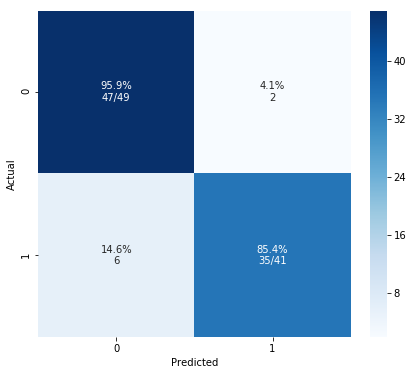

In [29]:
cm_analysis(y_test, y_pred, log_reg.classes_)

* True Positives (TP): 36
* True Negatives (TN): 46
* False Positives (FP): 2 ("Type I error")
* False Negatives (FN): 6 ("Type II error")

In [30]:
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred)
auc1 = cross_val_score(log_reg,X,y,cv=10,scoring='roc_auc').mean()
acc1 = cross_val_score(log_reg,X,y,cv=10,scoring='accuracy').mean()

## Making predictions using Gaussian Naive Bayes model

In [31]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

### The prediction:

In [32]:
pred, counts = np.unique(y_pred, return_counts=True)
dict(zip(pred, counts))

{0: 55, 1: 35}

#### confusion matrix:

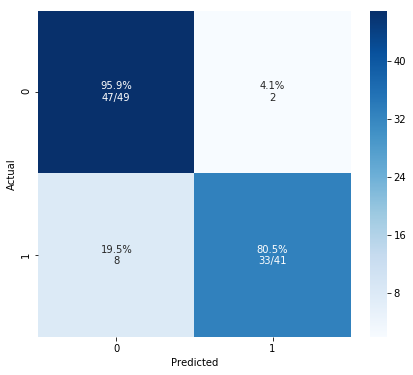

In [33]:
cm_analysis(y_test, y_pred, gnb.classes_)

* True Positives (TP): 33
* True Negatives (TN): 47
* False Positives (FP): 2 ("Type I error")
* False Negatives (FN): 8 ("Type II error")

In [34]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred)
auc2 = cross_val_score(gnb,X,y,cv=10,scoring='roc_auc').mean()
acc2 = cross_val_score(gnb,X,y,cv=10,scoring='accuracy').mean()

## Making predictions using Adaboost model

In [35]:
ada=AdaBoostClassifier()
parm_grid={'n_estimators':[50,100,150],'learning_rate':[0.001,0.01,0.1]}
grid=GridSearchCV(estimator=ada,param_grid=parm_grid,scoring='accuracy',cv=10)
grid.fit(X,y)
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [36]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate= 0.01,random_state=random_state )
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

### The prediction:

In [37]:
pred, counts = np.unique(y_pred, return_counts=True)
dict(zip(pred, counts))

{0: 52, 1: 38}

#### confusion matrix:

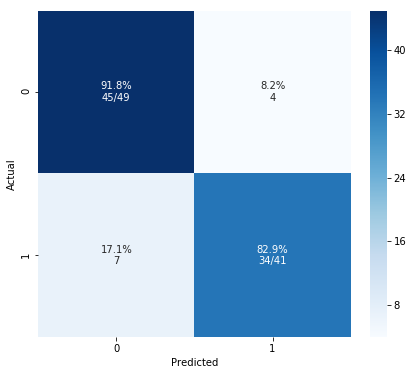

In [38]:
cm_analysis(y_test, y_pred, abc.classes_)

* True Positives (TP): 34
* True Negatives (TN): 45
* False Positives (FP): 4 ("Type I error")
* False Negatives (FN): 7 ("Type II error")

In [39]:
fpr3, tpr3, thresholds = metrics.roc_curve(y_test, y_pred)
auc3 = cross_val_score(abc,X,y,cv=10,scoring='roc_auc').mean()
acc3 = cross_val_score(abc,X,y,cv=10,scoring='accuracy').mean()

## Making predictions using PCA model

In [40]:
X = scaler.fit_transform(data.iloc[:, :-1].values)  
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state )

best parameter for Decision Tree model

In [41]:
param_grid={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)
print(grid.best_params_)

{'max_depth': 3, 'min_samples_split': 10}


In [42]:
dtc = DecisionTreeClassifier(random_state=random_state ,max_depth= 3,min_samples_split= 10)

best parameter for k-Nearest Neighbors model

In [43]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)
print(grid.best_params_)

{'n_neighbors': 13, 'weights': 'uniform'}


In [44]:
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')

In [45]:
names = ["k-Nearest Neighbors","Decision Tree","AdaBoost","Gaussian Naive Bayes","Logistic Regression"]

algorithms = [knn, dtc, abc, gnb, log_reg]
classifiers = {  "k-Nearest Neighbors" : knn,
                 "Decision Tree" : dtc,
                 "AdaBoost" : abc,
                 "Gaussian Naive Bayes" : gnb,
                 "Logistic Regression" : log_reg,
              }

with PCA:

In [46]:
import sys

In [47]:
all_components = pd.DataFrame(index=names)
for n in np.arange(1,14,1):
    score=[]
    sys.stdout.write(str(n)+'...')
    if (n==13):
        print ('done')
    pca = PCA(n_components=n,random_state=random_state)
    pca.fit(X)
    X_pca = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = random_state )
    for model in algorithms:
        model.fit(X_train,y_train)
        pred_test = model.predict(X_test)
        score.append(metrics.accuracy_score(pred_test, y_test))
    score = pd.DataFrame(score, index=names)   
    score.columns=[n]
    all_components = pd.concat([all_components,score],axis=1)
all_components = all_components.transpose()

1...2...3...4...5...6...7...8...9...10...11...12...13...done


In [48]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

all_components.style.apply(highlight_max)

,k-Nearest Neighbors,Decision Tree,AdaBoost,Gaussian Naive Bayes,Logistic Regression
1,0.844444,0.777778,0.777778,0.877778,0.877778
2,0.855556,0.811111,0.777778,0.9,0.877778
3,0.866667,0.811111,0.777778,0.877778,0.9
4,0.888889,0.755556,0.777778,0.877778,0.877778
5,0.888889,0.755556,0.777778,0.888889,0.888889
6,0.888889,0.755556,0.777778,0.888889,0.888889
7,0.866667,0.744444,0.777778,0.877778,0.9
8,0.866667,0.744444,0.777778,0.888889,0.9
9,0.855556,0.744444,0.777778,0.877778,0.9
10,0.877778,0.744444,0.777778,0.866667,0.911111


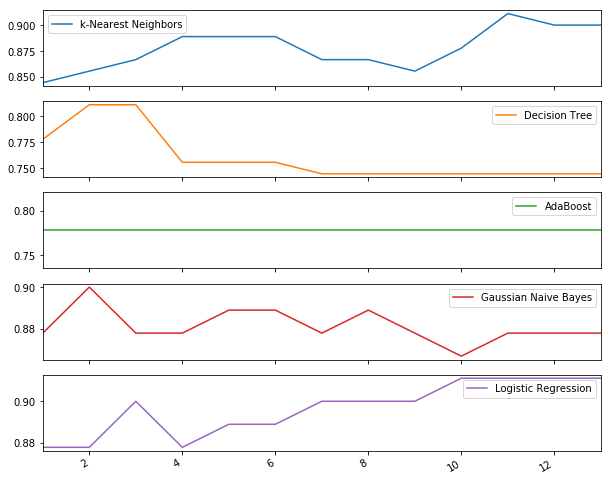

In [49]:
_= all_components.plot(subplots=True, figsize=(10, 9))

## Making predictions using ICA model

In [50]:
all_components1 = pd.DataFrame(index=names)
for n in np.arange(1,14,1):
    score=[]
    sys.stdout.write(str(n)+'...')
    if (n==13):
        print ('done')
    ica = FastICA(n_components=n,random_state=random_state )
    ica.fit(data)
    X = ica.transform(data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state )
    for model in algorithms:
        model.fit(X_train,y_train)
        pred_test = model.predict(X_test)
        score.append(metrics.accuracy_score(pred_test, y_test))
    score = pd.DataFrame(score, index=names)   
    score.columns=[n]
    all_components1 = pd.concat([all_components1,score],axis=1)

1...2...3...4...5...6...7...8...9...10...11...12...13...done


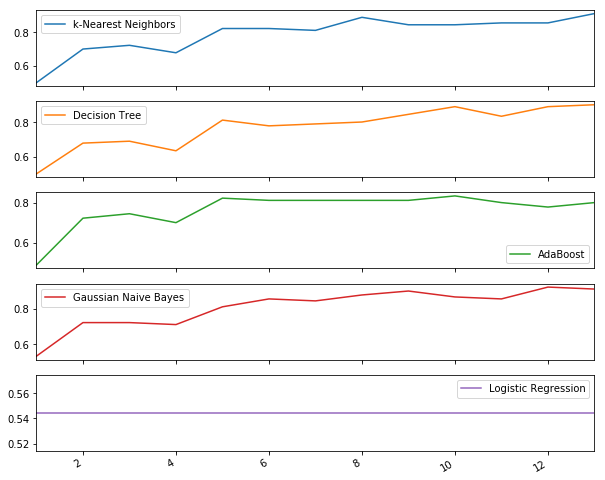

In [51]:
_= all_components1.transpose().plot(subplots=True, figsize=(10, 9))

## Making predictions using Voting Classifier model

In [52]:
classifiers = [('log', log_reg), ('knn', knn),('dtc',dtc), ('gnb',gnb), ('abc',abc)]

In [53]:
# # takes very long time to run

# df = pd.DataFrame(columns=('w1', 'w2', 'w3','w4','w5', 'score'))

# i = 0
# for w1 in range(0,4):
#     for w2 in range(0,4):
#         for w3 in range(0,4):
#             for w4 in range(0,4):
#                 for w5 in range(0,4):
                    
#                     if len(set((w1,w2,w3,w4,w5))) == 1: # skip if all weights are equal
#                         continue
#                     vc = VotingClassifier(classifiers, weights=[w1,w2,w3,w4,w5])
#                     vc.fit(X_train,y_train)
#                     y_pred = vc.predict(X_test)
#                     df.loc[i] = [w1, w2, w3,w4,w5, metrics.accuracy_score(y_test, y_pred)]
#                     i += 1
# df.sort_values(by=['score'], ascending=False).head()

| w1 | w2 | w3 | w4 | w5 | score |
| --- | --- | --- | --- | --- | --- |
| 0.0 | 2.0 | 3.0| 2.0 | 0.0 | 0.955556 |
| 0.0 | 3.0 | 2.0| 3.0 | 0.0 | 0.955556 |
| 0.0 | 2.0 | 1.0| 3.0 | 1.0 | 0.955556 |
| 0.0 | 3.0 | 3.0| 1.0 | 0.0 | 0.955556 |
| 0.0 | 1.0 | 3.0| 3.0 | 0.0 | 0.955556 |

In [54]:
vc = VotingClassifier(classifiers, voting='soft',weights=[0,2,3,2,0])

In [55]:
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)

### The prediction:

In [56]:
pred, counts = np.unique(y_pred, return_counts=True)
dict(zip(pred, counts))

{0: 49, 1: 41}

#### confusion matrix:

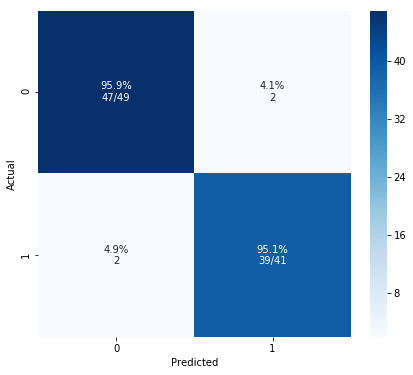

In [57]:
cm_analysis(y_test, y_pred, vc.classes_)

* True Positives (TP): 39
* True Negatives (TN): 47
* False Positives (FP): 2 ("Type I error")
* False Negatives (FN): 2 ("Type II error")

In [58]:
metrics.accuracy_score(y_test, y_pred)

0.9555555555555556

In [59]:
fpr4, tpr4, thresholds = metrics.roc_curve(y_test, y_pred)
auc4 = cross_val_score(vc,X,y,cv=10,scoring='roc_auc').mean()
acc4 = cross_val_score(vc,X,y,cv=10,scoring='accuracy').mean()

## zero model

we can notice that the zero model that return one answer all the time is significantly worse than the other models that were trained above.

In [60]:
from sklearn.dummy import DummyClassifier
null_model = DummyClassifier(random_state=random_state)
null_model.fit(X_train, y_train)
y_pred = null_model.predict(X_test)

#### confusion matrix:

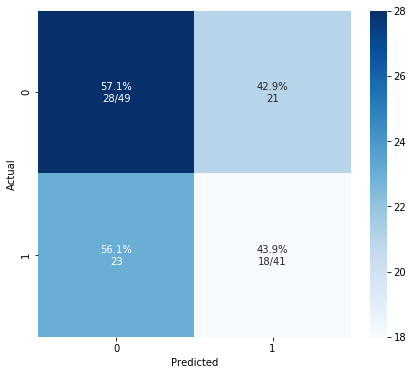

In [61]:
cm_analysis(y_test, y_pred, null_model.classes_)

In [62]:
fpr5, tpr5, thresholds = metrics.roc_curve(y_test, y_pred)
auc5 = cross_val_score(null_model,X,y,cv=10,scoring='roc_auc').mean()
acc5 = cross_val_score(null_model,X,y,cv=10,scoring='accuracy').mean()

## compare between models

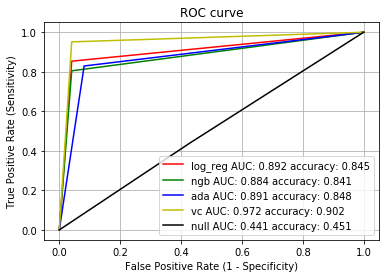

In [63]:
plt.plot(fpr1, tpr1,'r-',label = 'log_reg AUC: %.3f accuracy: %.3f'% (auc1,acc1))
plt.plot(fpr2, tpr2,'g-',label = 'ngb AUC: %.3f accuracy: %.3f'% (auc2,acc2))
plt.plot(fpr3, tpr3,'b-',label = 'ada AUC: %.3f accuracy: %.3f'% (auc3,acc3))
plt.plot(fpr4, tpr4,'y-',label = 'vc AUC: %.3f accuracy: %.3f'% (auc4,acc4))
plt.plot(fpr5, tpr5,'k-',label = 'null AUC: %.3f accuracy: %.3f'% (auc5,acc5))

plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid()